<a href="https://colab.research.google.com/github/zuzannazak/random-files-i-need-sometimes/blob/main/SID_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Wielokrotna imputacja*

Zuzanna Lasyk,

Bartłomiej Lubianiec,

Jakub Skotarek,

Zuzanna Żak

Wielokrotna imputacja to technika radzenia sobie z brakami danych w zbiorze danych i może być wykorzystywana także jako część kompletowania zbioru danych w oparciu o podzbiory pochodzące z różnych źródeł.

Wielokrotna imputacja polega na uzupełnieniu brakujących wartości rozkładem zaobserwowanych danych by uwzględnić niepewność przy estymacie prawidłowej wartości.

Implementacje wielokrotnej imputacji w R:


*   Pakiet MICE - https://cran.r-project.org/web/packages/mice/index.html
*   Pakiet Amelia - https://cran.r-project.org/web/packages/Amelia/index.html 
*   Pakiet norm - https://www.rdocumentation.org/packages/norm/versions/1.0-9.5
*   Pakiet missForest - https://cran.r-project.org/web/packages/missForest/index.html
*   Pakiet mi - https://cran.r-project.org/web/packages/mi/index.html



### Przygotowanie R w colabie

In [1]:
%load_ext rpy2.ipython

## Przykład 1 - dane medyczne ze sztucznie utworzonymi brakami w danych

### Przygotowanie przykładowych danych do imputacji

In [ ]:
%%R
dat <- read.csv(url("https://goo.gl/4DYzru"), header=TRUE, sep=",")
head(dat)

   Age Gender Cholesterol SystolicBP  BMI Smoking Education
1 67.9 Female       236.4      129.8 26.4     Yes      High
2 54.8 Female       256.3      133.4 28.4      No    Medium
3 68.4   Male       198.7      158.5 24.1     Yes      High
4 67.9   Male       205.0      136.0 19.9      No       Low
5 60.9   Male       207.7      145.4 26.7      No    Medium
6 44.9 Female       222.5      130.6 30.6      No       Low


In [ ]:
%%R
#Sprawdzanie wartości pustych
sapply(dat, function(x) sum(is.na(x)))
#Zamiana zmiennych na factory lub wartości liczbowe
library(dplyr) 
dat <- dat %>%
    mutate(
        Smoking = as.factor(Smoking),
        Education = as.factor(Education),
        Cholesterol = as.numeric(Cholesterol)
    )
str(dat)

'data.frame':	250 obs. of  7 variables:
 $ Age        : num  67.9 54.8 68.4 67.9 60.9 44.9 49.9 55.1 57.5 77.2 ...
 $ Gender     : chr  "Female" "Female" "Male" "Male" ...
 $ Cholesterol: num  236 256 199 205 208 ...
 $ SystolicBP : num  130 133 158 136 145 ...
 $ BMI        : num  26.4 28.4 24.1 19.9 26.7 30.6 27.3 27.5 28.3 29.1 ...
 $ Smoking    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ Education  : Factor w/ 3 levels "High","Low","Medium": 1 3 1 2 3 2 3 2 1 1 ...


In [ ]:
%%R
#Dodanie wartości pustych dla przykładu
original = dat
set.seed(10)
dat[sample(1:nrow(dat), 20), "Cholesterol"] <- NA
dat[sample(1:nrow(dat), 20), "Smoking"] <- NA
dat[sample(1:nrow(dat), 20), "Education"] <- NA
dat[sample(1:nrow(dat), 5), "Age"] <- NA
dat[sample(1:nrow(dat), 5), "BMI"] <- NA
sapply(dat, function(x) sum(is.na(x)))

        Age      Gender Cholesterol  SystolicBP         BMI     Smoking 
          5           0          20           0           5          20 
  Education 
         20 


In [ ]:
%%R
#Zamiana zmiennych na factory lub wartości liczbowe
library(dplyr) 
dat <- dat %>%
    mutate(
        Smoking = as.factor(Smoking),
        Education = as.factor(Education),
        Cholesterol = as.numeric(Cholesterol)
    )
str(dat)

'data.frame':	250 obs. of  7 variables:
 $ Age        : num  67.9 54.8 68.4 67.9 60.9 44.9 49.9 55.1 57.5 77.2 ...
 $ Gender     : chr  "Female" "Female" "Male" "Male" ...
 $ Cholesterol: num  236 256 199 205 208 ...
 $ SystolicBP : num  130 133 158 136 145 ...
 $ BMI        : num  26.4 28.4 24.1 19.9 26.7 30.6 27.3 27.5 28.3 29.1 ...
 $ Smoking    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 NA 1 1 1 ...
 $ Education  : Factor w/ 3 levels "High","Low","Medium": 1 3 1 2 3 2 3 2 1 1 ...


### Imputacja

In [ ]:
%%R
install.packages("mice")
library(mice) #Przewidywanie wartości pustych na podstawie innych zmiennych
init = mice(dat, maxit=0) 
meth = init$method
predM = init$predictorMatrix
predM[, c("BMI")]=0 #Wyłączenie zmiennej BMI z przewidywania
meth[c("Age")]="" #Ta zmienna nie będzie imputowana

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mice_3.13.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 574057 bytes (560 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
#sprecyzowanie metod imputacji
meth[c("Cholesterol")]="norm" 
meth[c("Smoking")]="logreg" 
meth[c("Education")]="polyreg"

In [ ]:
%%R
set.seed(103)
imputed = mice(dat, method=meth, predictorMatrix=predM, m=5)


 iter imp variable
  1   1  Cholesterol  BMI  Smoking  Education
  1   2  Cholesterol  BMI  Smoking  Education
  1   3  Cholesterol  BMI  Smoking  Education
  1   4  Cholesterol  BMI  Smoking  Education
  1   5  Cholesterol  BMI  Smoking  Education
  2   1  Cholesterol  BMI  Smoking  Education
  2   2  Cholesterol  BMI  Smoking  Education
  2   3  Cholesterol  BMI  Smoking  Education
  2   4  Cholesterol  BMI  Smoking  Education
  2   5  Cholesterol  BMI  Smoking  Education
  3   1  Cholesterol  BMI  Smoking  Education
  3   2  Cholesterol  BMI  Smoking  Education
  3   3  Cholesterol  BMI  Smoking  Education
  3   4  Cholesterol  BMI  Smoking  Education
  3   5  Cholesterol  BMI  Smoking  Education
  4   1  Cholesterol  BMI  Smoking  Education
  4   2  Cholesterol  BMI  Smoking  Education
  4   3  Cholesterol  BMI  Smoking  Education
  4   4  Cholesterol  BMI  Smoking  Education
  4   5  Cholesterol  BMI  Smoking  Education
  5   1  Cholesterol  BMI  Smoking  Education
  5   2  Chole

In [ ]:
%%R
imputed <- complete(imputed)
sapply(imputed, function(x) sum(is.na(x)))

        Age      Gender Cholesterol  SystolicBP         BMI     Smoking 
          5           0           0           0           0           0 
  Education 
          1 


### Sprawdzenie poprawności imputacji


In [ ]:
%%R
summary(original)

      Age           Gender           Cholesterol      SystolicBP   
 Min.   :33.70   Length:250         Min.   :157.5   Min.   :117.5  
 1st Qu.:51.12   Class :character   1st Qu.:207.5   1st Qu.:138.6  
 Median :56.75   Mode  :character   Median :222.7   Median :145.4  
 Mean   :57.50                      Mean   :224.1   Mean   :145.5  
 3rd Qu.:62.88                      3rd Qu.:241.2   3rd Qu.:153.2  
 Max.   :79.30                      Max.   :303.0   Max.   :175.4  
      BMI        Smoking    Education  
 Min.   :13.80   No :178   High  :108  
 1st Qu.:23.93   Yes: 72   Low   : 71  
 Median :26.60             Medium: 71  
 Mean   :26.79                         
 3rd Qu.:29.50                         
 Max.   :38.70                         


In [ ]:
%%R
summary(imputed)

      Age           Gender           Cholesterol      SystolicBP   
 Min.   :33.70   Length:250         Min.   :170.3   Min.   :117.5  
 1st Qu.:51.50   Class :character   1st Qu.:208.7   1st Qu.:138.6  
 Median :56.90   Mode  :character   Median :223.6   Median :145.4  
 Mean   :57.63                      Mean   :225.1   Mean   :145.5  
 3rd Qu.:63.20                      3rd Qu.:242.1   3rd Qu.:153.2  
 Max.   :79.30                      Max.   :303.0   Max.   :175.4  
 NA's   :5                                                         
      BMI        Smoking    Education  
 Min.   :13.80   No :179   High  :110  
 1st Qu.:23.93   Yes: 71   Low   : 69  
 Median :26.65             Medium: 70  
 Mean   :26.79             NA's  :  1  
 3rd Qu.:29.50                         
 Max.   :38.70                         
                                       


Jak widać powyżej, po imputacji dla zmiennej Cholesterol średnia wynosi 225.1 a w oryginalnych danych, w których brakowało 20 danych, wynosiła 224.6.

W przypadku zmiennej Education, pozostał 1 brak danych po imputacji. Po imputacji odpowiedź "High" stanowi 44% znanych odpowiedzi, natomiast przed stanowiła 43%. W przypadku odpowiedzi "Medium" to po imputacji 20% a przed 29%. W przypadku "Low" to 28% po imputacji jak i przed nią.

## Przykład 2 - dane COVID (R interpreter error)

### Przygotowanie przykładowych danych do imputacji

In [ ]:
%%R
data <- read.csv('https://raw.githubusercontent.com/zuzannazak/random-files-i-need-sometimes/main/dane_covid.csv', header=TRUE, sep=";") #plik pobrany z https://www.kaggle.com/aditeloo/the-world-dataset-of-covid19, dla daty 20.05.2021

In [ ]:
%%R
install.packages("tidyverse")
library(tidyverse)

In [ ]:
%%R
data <- data %>% 
 dplyr::select(continent,location, total_cases, total_deaths, population, life_expectancy)


data <- data %>% filter(continent=="Europe")
data <- data %>%
    mutate(
        continent = as.factor(continent),
        location = as.factor(location),
        total_cases = as.numeric(total_cases),
        total_deaths = as.numeric(total_deaths),
        population = as.numeric(population),
        life_expectancy = as.numeric(life_expectancy)
    )
str(data)



In [ ]:
%%R
head(data)

### Imputacja

In [ ]:
%%R
library(mice) #Przewidywanie wartości pustych na podstawie innych zmiennych
init1 = mice(data, maxit=0) 
meth1 = init1$method
predM1 = init1$predictorMatrix

In [ ]:
%%R
#Ta zmienna nie będzie imputowana
meth1[c("continent")]="" 
meth1[c("location")]="" 
meth1[c("population")]="" 
meth[c("life_expectancy")]="" 
#sprecyzowanie metod imputacji
meth1[c("total_cases")]="norm" 
meth1[c("total_deaths")]="norm"
meth1

In [ ]:
%%R
set.seed(10)
data_imputed = mice(data, method=meth1, predictorMatrix=predM1, m=5)

## Przykład 3 - dane o klientach banku

In [2]:
%%R
bankset <- read.csv(url("https://raw.githubusercontent.com/Morgar4D/test/main/BankChurners%20-%20BankChurners.csv"), header=TRUE, sep=",")
head(bankset)

  Customer_Age Gender Dependent_count Education_Level Marital_Status
1           45      M               3     High School        Married
2           49      F               5        Graduate         Single
3           51      M               3        Graduate        Married
4           40      F               4     High School           <NA>
5           40      M               3      Uneducated        Married
6           44      M               2        Graduate        Married
  Income_Category Card_Category Months_on_book Total_Relationship_Count
1     $60K - $80K          Blue             39                        5
2  Less than $40K          Blue             44                        6
3    $80K - $120K          Blue             36                        4
4  Less than $40K          Blue             34                        3
5     $60K - $80K          Blue             21                        5
6     $40K - $60K          Blue             36                        3
  Months_Inac

In [3]:
%%R
typeof(bankset)

[1] "list"


In [4]:
%%R
#Sprawdzanie wartości pustych
sapply(bankset, function(x) sum(is.na(x)))

            Customer_Age                   Gender          Dependent_count 
                       0                        0                        0 
         Education_Level           Marital_Status          Income_Category 
                    1519                      749                     1112 
           Card_Category           Months_on_book Total_Relationship_Count 
                       0                        0                        0 
  Months_Inactive_12_mon    Contacts_Count_12_mon             Credit_Limit 
                       0                        0                        0 
     Total_Revolving_Bal          Avg_Open_To_Buy     Total_Amt_Chng_Q4_Q1 
                       0                        0                        0 
         Total_Trans_Amt           Total_Trans_Ct      Total_Ct_Chng_Q4_Q1 
                       0                        0                        0 
   Avg_Utilization_Ratio 
                       0 


In [5]:
%%R
#Zamiana zmiennych na factory lub wartości liczbowe
library(dplyr) 
bankset <- bankset %>%
    mutate(
        Education_Level = as.factor(Education_Level),
        Marital_Status = as.factor(Marital_Status),
        Income_Category = as.factor(Income_Category)
    )
str(bankset)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	10127 obs. of  19 variables:
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : chr  "M" "F" "M" "F" ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 6 levels "College","Doctorate",..: 4 3 3 4 6 3 NA 4 6 3 ...
 $ Marital_Status          : Factor w/ 3 levels "Divorced","Married",..: 2 3 2 NA 2 2 2 NA 3 3 ...
 $ Income_Category         : Factor w/ 5 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : chr  "Blue" "Blue" "Blue" "Blue" ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : int  1 1 1 4 1 1 1 2 2 3 ...
 $ Contacts_Count_12_mon   : int  3 2 0 1 0 2 3 2 0 3 ...
 $ Credit_Limit            : num  12691 8256 3418 3313 4716 ...
 $ Total_Revolving_Bal     : int  777 864 0 2517 0 1247 2264 1396 2517 1677 ...
 $ Avg_Open_To_Buy         

In [17]:
%%R
summary(bankset)

  Customer_Age      Gender          Dependent_count      Education_Level
 Min.   :26.00   Length:10127       Min.   :0.000   College      :1013  
 1st Qu.:41.00   Class :character   1st Qu.:1.000   Doctorate    : 451  
 Median :46.00   Mode  :character   Median :2.000   Graduate     :3128  
 Mean   :46.33                      Mean   :2.346   High School  :2013  
 3rd Qu.:52.00                      3rd Qu.:3.000   Post-Graduate: 516  
 Max.   :73.00                      Max.   :5.000   Uneducated   :1487  
                                                    NA's         :1519  
  Marital_Status       Income_Category Card_Category      Months_on_book 
 Divorced: 748   $120K +       : 727   Length:10127       Min.   :13.00  
 Married :4687   $40K - $60K   :1790   Class :character   1st Qu.:31.00  
 Single  :3943   $60K - $80K   :1402   Mode  :character   Median :36.00  
 NA's    : 749   $80K - $120K  :1535                      Mean   :35.93  
                 Less than $40K:3561          

### Imputacja

In [7]:
%%R
install.packages("mice")
library(mice) #Przewidywanie wartości pustych na podstawie innych zmiennych

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mice_3.13.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 574057 bytes (560 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [9]:
%%R
init = mice(bankset, maxit=0) 
meth = init$method
predM = init$predictorMatrix
predM[, c("Total_Amt_Chng_Q4_Q1")]=0 #Wyłączenie zmiennej z przewidywania
predM

                         Customer_Age Gender Dependent_count Education_Level
Customer_Age                        0      0               1               1
Gender                              1      0               1               1
Dependent_count                     1      0               0               1
Education_Level                     1      0               1               0
Marital_Status                      1      0               1               1
Income_Category                     1      0               1               1
Card_Category                       1      0               1               1
Months_on_book                      1      0               1               1
Total_Relationship_Count            1      0               1               1
Months_Inactive_12_mon              1      0               1               1
Contacts_Count_12_mon               1      0               1               1
Credit_Limit                        1      0               1               1

In [10]:
%%R
#sprecyzowanie metod imputacji
meth[c("Education_Level")]="polyreg" 
meth[c("Marital_Status")]="polyreg" 
meth[c("Income_Category")]="polyreg"


In [11]:
%%R
set.seed(103)
imputedbanks = mice(bankset, method=meth, predictorMatrix=predM, m=5)


 iter imp variable
  1   1  Education_Level  Marital_Status  Income_Category
  1   2  Education_Level  Marital_Status  Income_Category
  1   3  Education_Level  Marital_Status  Income_Category
  1   4  Education_Level  Marital_Status  Income_Category
  1   5  Education_Level  Marital_Status  Income_Category
  2   1  Education_Level  Marital_Status  Income_Category
  2   2  Education_Level  Marital_Status  Income_Category
  2   3  Education_Level  Marital_Status  Income_Category
  2   4  Education_Level  Marital_Status  Income_Category
  2   5  Education_Level  Marital_Status  Income_Category
  3   1  Education_Level  Marital_Status  Income_Category
  3   2  Education_Level  Marital_Status  Income_Category
  3   3  Education_Level  Marital_Status  Income_Category
  3   4  Education_Level  Marital_Status  Income_Category
  3   5  Education_Level  Marital_Status  Income_Category
  4   1  Education_Level  Marital_Status  Income_Category
  4   2  Education_Level  Marital_Status  Income_Cat

In [12]:
%%R
imputedbanks <- complete(imputedbanks)
sapply(imputedbanks, function(x) sum(is.na(x)))

            Customer_Age                   Gender          Dependent_count 
                       0                        0                        0 
         Education_Level           Marital_Status          Income_Category 
                       0                        0                        0 
           Card_Category           Months_on_book Total_Relationship_Count 
                       0                        0                        0 
  Months_Inactive_12_mon    Contacts_Count_12_mon             Credit_Limit 
                       0                        0                        0 
     Total_Revolving_Bal          Avg_Open_To_Buy     Total_Amt_Chng_Q4_Q1 
                       0                        0                        0 
         Total_Trans_Amt           Total_Trans_Ct      Total_Ct_Chng_Q4_Q1 
                       0                        0                        0 
   Avg_Utilization_Ratio 
                       0 


### Sprawdzenie poprawności imputacji

In [15]:
%%R
summary(imputedbanks)

  Customer_Age      Gender          Dependent_count      Education_Level
 Min.   :26.00   Length:10127       Min.   :0.000   College      :1210  
 1st Qu.:41.00   Class :character   1st Qu.:1.000   Doctorate    : 539  
 Median :46.00   Mode  :character   Median :2.000   Graduate     :3664  
 Mean   :46.33                      Mean   :2.346   High School  :2373  
 3rd Qu.:52.00                      3rd Qu.:3.000   Post-Graduate: 598  
 Max.   :73.00                      Max.   :5.000   Uneducated   :1743  
  Marital_Status       Income_Category Card_Category      Months_on_book 
 Divorced: 813   $120K +       : 843   Length:10127       Min.   :13.00  
 Married :5055   $40K - $60K   :2008   Class :character   1st Qu.:31.00  
 Single  :4259   $60K - $80K   :1603   Mode  :character   Median :36.00  
                 $80K - $120K  :1746                      Mean   :35.93  
                 Less than $40K:3927                      3rd Qu.:40.00  
                                             

Poniżej przedstawiono porównanie danych dla zmiennej Education_Level przed i po imputacji.

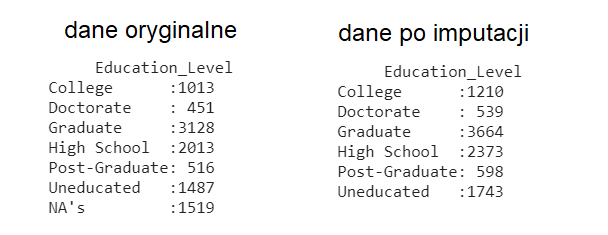




Porównując rozłożenie danych odpowiedzi wśród znanych obserwacji w obydwu zestawach danych, można zauważyć że nie ma znacznych różnic pomiędzy proporcją odpowiedzi w danych oryginalnych a danych imputowanych.

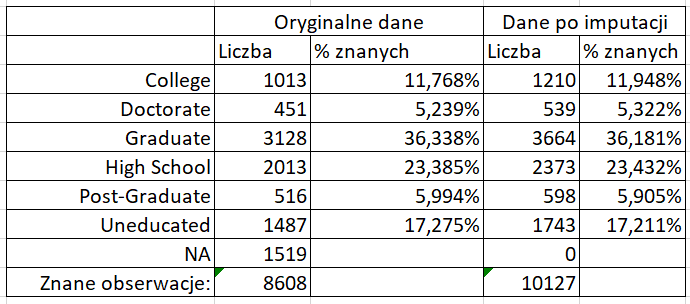

Poniżej przedstawiono porównanie danych dla zmiennej Marital_Status przed i po imputacji.
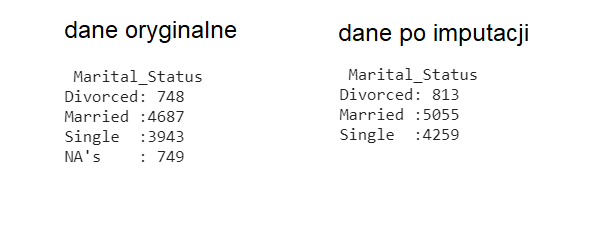

Nie zaobserwowano znacznych różnic w proporcjach w udzielonych odpowiedziach między zbiorami danych, jednak można zauważyć że w danych imputowanych proporcjonalnie więcej respondentów zostało oznaczonych jako rozwiedzionych, mniej jako będących po ślubie i więcej jako singli.

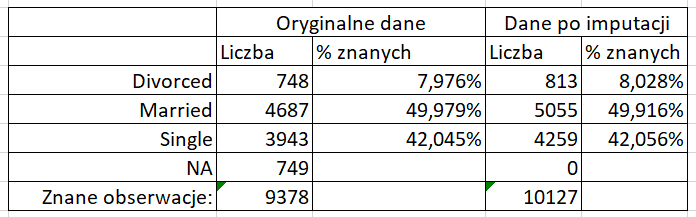


Poniżej przedstawiono porównanie danych dla zmiennej Income_Category przed i po imputacji.
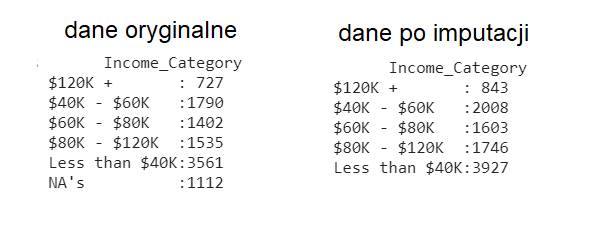

Nie zaobserwowano znacznych różnic w proporcjach w udzielonych odpowiedziach między zbiorami danych, jednak w danych po imputacji w kwestii wypowiedzi "less than $40K" model imputował ją proporcjonalnie o prawie 1% rzadziej niż była wybierana w danych oryginalnych spośród udzielonych odpowiedzi.

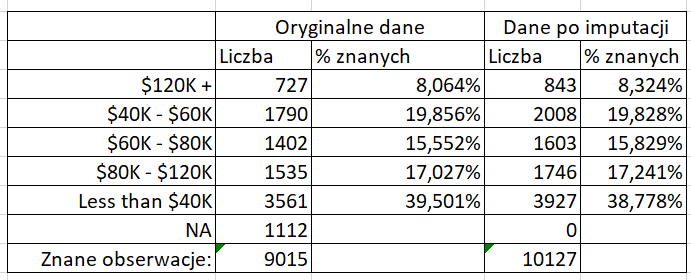

# Źródła:


*   https://www.ajs.or.at/index.php/ajs/article/view/vol33%2C%20no1%262%20-%209
*   https://data.library.virginia.edu/getting-started-with-multiple-imputation-in-r/
*   https://www.statisticssolutions.com/dissertation-resources/multiple-imputation-for-missing-data/
*   https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/
*   https://datascienceplus.com/handling-missing-data-with-mice-package-a-simple-approach/

